In [152]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from scipy import stats

Исходная таблица измерений

In [153]:
table_1 = pd.read_csv('songs_data.txt', header=None, names=['cnt_i, слова'])
table_1.index = range(1, 51)

table_1[['cnt_i - <cnt>_N, слова', '(cnt_i - <cnt>_N)^2, слова^2']] = 0

table_1

,"cnt_i, слова","cnt_i - <cnt>_N, слова","(cnt_i - <cnt>_N)^2, слова^2"
1,412,0,0
2,378,0,0
3,512,0,0
4,456,0,0
5,678,0,0
6,289,0,0
7,345,0,0
8,423,0,0
9,389,0,0
10,467,0,0


Нахождение минимума и максимума

In [154]:
cnt_min = table_1['cnt_i, слова'].min()

print(f'минимум: {cnt_min}')

минимум: 155


In [155]:
cnt_max = table_1['cnt_i, слова'].max()

print(f'максимум: {cnt_max}')

максимум: 953


разбиение интервала на m равных интервалов промежутка [t_min, t_max]

In [156]:
m = round(sqrt(len(table_1)), 0)

cnt_range = cnt_max - cnt_min
delta_cnt = int(cnt_range / m)

print(f'число интервалов: {int(m)}')
print(f'размах: {cnt_range}')
print(f'ширина интервала: {delta_cnt}')

число интервалов: 7
размах: 798
ширина интервала: 114


In [157]:
intervals = []
for i in range(int(m)):
    lower_bound = cnt_min + i * delta_cnt
    upper_bound = cnt_min + (i + 1) * delta_cnt - 1
    intervals.append((int(lower_bound), int(upper_bound)))

intervals[-1] = (intervals[-1][0], cnt_max)

intervals

[(155, 268),
 (269, 382),
 (383, 496),
 (497, 610),
 (611, 724),
 (725, 838),
 (839, np.int64(953))]

вторая таблица

In [158]:
table_2 = pd.DataFrame({
    'Границы интервалов, слова': [f"{lower}-{upper}" for lower, upper in intervals],
    'delta_N': [0] * len(intervals),
    'delta_N / (N * delta_N), слова^-1': [0.0] * len(intervals),
    'cnt, слова': [0.0] * len(intervals),
    'p, слова^-1': [0.0] * len(intervals)
})

for i, (lower, upper) in enumerate(intervals):
    if i == len(intervals) - 1:
        count = len(table_1[(table_1['cnt_i, слова'] >= lower) & (table_1['cnt_i, слова'] <= upper)])
    else:
        count = len(table_1[(table_1['cnt_i, слова'] >= lower) & (table_1['cnt_i, слова'] < upper)])
    table_2.loc[i, 'delta_N'] = count

N = len(table_1)
for i in range(len(table_2)):
    delta_N = table_2.loc[i, 'delta_N']
    table_2.loc[i, 'delta_N / (N * delta_N), слова^-1'] = delta_N / (N * delta_cnt)

table_2

,"Границы интервалов, слова",delta_N,"delta_N / (N * delta_N), слова^-1","cnt, слова","p, слова^-1"
0,155-268,6,0.001053,0.0,0.0
1,269-382,12,0.002105,0.0,0.0
2,383-496,20,0.003509,0.0,0.0
3,497-610,6,0.001053,0.0,0.0
4,611-724,4,0.000702,0.0,0.0
5,725-838,1,0.000175,0.0,0.0
6,839-953,1,0.000175,0.0,0.0


гистограмма

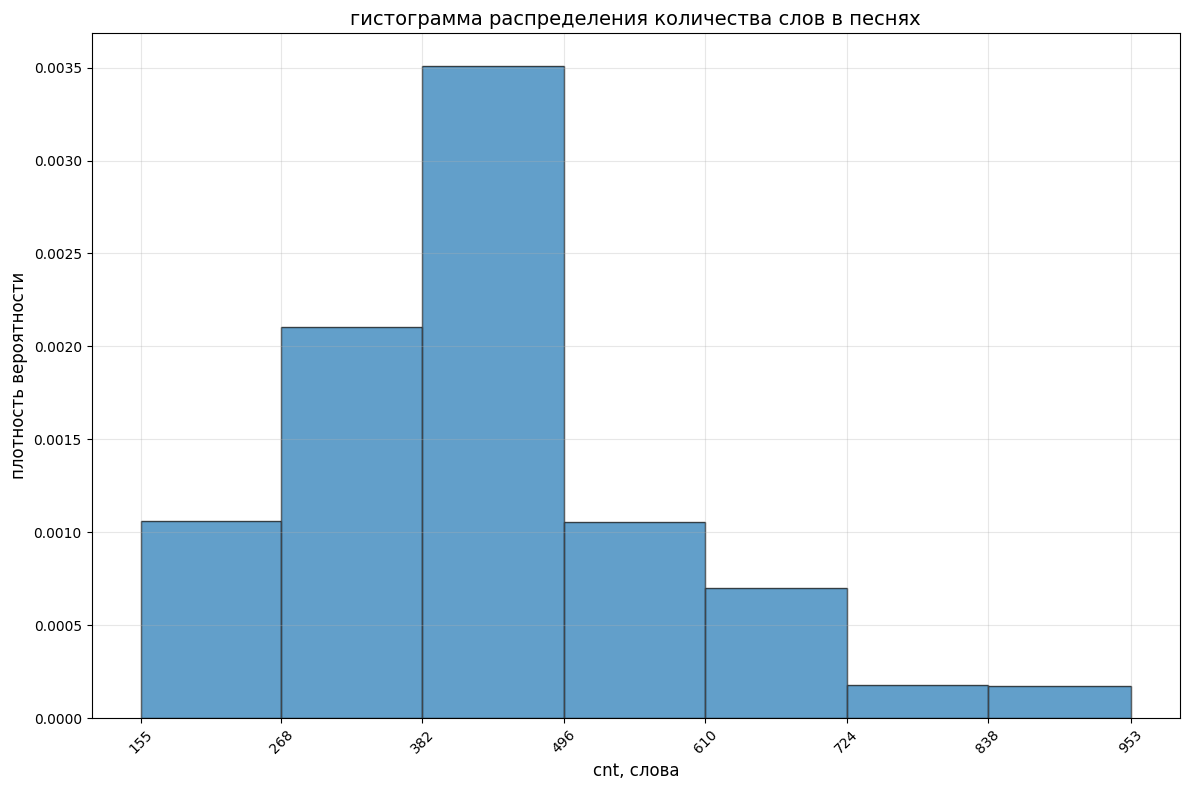

In [159]:
plt.figure(figsize=(12, 8))

all_values = table_1['cnt_i, слова'].values

plt.hist(all_values, bins=bin_edges, density=True, alpha=0.7, edgecolor='black')

plt.xlabel('cnt, слова', fontsize=12)
plt.ylabel('плотность вероятности', fontsize=12)
plt.title('гистограмма распределения количества слов в песнях', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(bin_edges, rotation=45)
plt.tight_layout()
plt.show()

вычисление подвала таблицы 1

In [160]:
cnt_mean = table_1['cnt_i, слова'].mean()
std = table_1['cnt_i, слова'].std()
test = table_1['cnt_i, слова'].sum() - 50 * cnt_mean
p_max = 1 / (std * sqrt(2 * np.pi))

print(f'среднее <cnt>_N: {cnt_mean}')
print(f'выборочное среднеквадратичное отклонение: {std}')
print(f'контроль правильности нахождения среднего: {test}')
print(f'максимальное значение плотности распределения: {p_max}')

среднее <cnt>_N: 427.8
выборочное среднеквадратичное отклонение: 147.8046145478302
контроль правильности нахождения среднего: 0.0
максимальное значение плотности распределения: 0.002699119250247314


завершение второй таблицы

In [161]:
for i, (lower, upper) in enumerate(intervals):
    table_2.loc[i, 'cnt, слова'] = (lower + upper) / 2

for i in range(len(table_2)):
    t = table_2.loc[i, 'cnt, слова']
    exponent = -((t - cnt_mean) ** 2) / (2 * std ** 2)
    p_value = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(exponent)
    table_2.loc[i, 'p, слова^-1'] = p_value

table_2

,"Границы интервалов, слова",delta_N,"delta_N / (N * delta_N), слова^-1","cnt, слова","p, слова^-1"
0,155-268,6,0.001053,211.5,0.000925
1,269-382,12,0.002105,325.5,0.002124
2,383-496,20,0.003509,439.5,0.002691
3,497-610,6,0.001053,553.5,0.001880
4,611-724,4,0.000702,667.5,0.000725
5,725-838,1,0.000175,781.5,0.000154
6,839-953,1,0.000175,896.0,0.000018


гауссова нормализация

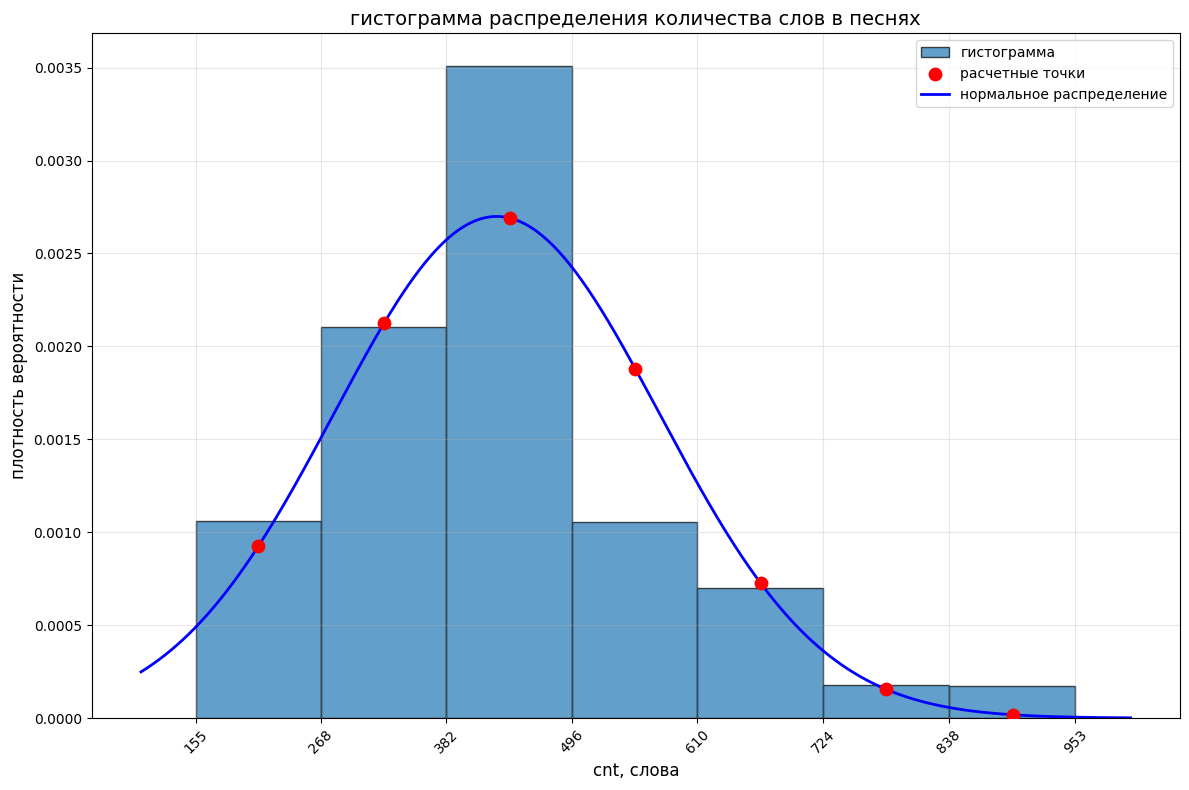

In [162]:
plt.figure(figsize=(12, 8))

all_values = table_1['cnt_i, слова'].values
plt.hist(all_values, bins=bin_edges, density=True, alpha=0.7, edgecolor='black', label='гистограмма')

plt.scatter(table_2['cnt, слова'], table_2['p, слова^-1'], color='red', s=80, zorder=5, label='расчетные точки')

t_range = np.linspace(cnt_min - 50, cnt_max + 50, 1000)
p_values = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-((t_range - cnt_mean) ** 2) / (2 * std ** 2))
plt.plot(t_range, p_values, 'b-', linewidth=2, label='нормальное распределение')

plt.xlabel('cnt, слова', fontsize=12)
plt.ylabel('плотность вероятности', fontsize=12)
plt.title('гистограмма распределения количества слов в песнях', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(bin_edges, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

завершение первой таблицы

In [163]:
table_1['cnt_i - <cnt>_N, слова'] = table_1['cnt_i, слова'] - cnt_mean
table_1['(cnt_i - <cnt>_N)^2, слова^2'] = (table_1['cnt_i, слова'] - cnt_mean) ** 2

table_1

,"cnt_i, слова","cnt_i - <cnt>_N, слова","(cnt_i - <cnt>_N)^2, слова^2"
1,412,-15.8,249.64
2,378,-49.8,2480.04
3,512,84.2,7089.64
4,456,28.2,795.24
5,678,250.2,62600.04
6,289,-138.8,19265.44
7,345,-82.8,6855.84
8,423,-4.8,23.04
9,389,-38.8,1505.44
10,467,39.2,1536.64


третья таблица

In [164]:
table_3 = pd.DataFrame({
    'интервал, слова': [
        f'cnt_mean +- std_N ({cnt_mean - std:.1f} - {cnt_mean + std:.1f})',
        f'cnt_mean +- 2std_N ({cnt_mean - 2*std:.1f} - {cnt_mean + 2*std:.1f})', 
        f'cnt_mean +- 3std_N ({cnt_mean - 3*std:.1f} - {cnt_mean + 3*std:.1f})'
    ],
    'delta_N': [0, 0, 0],
    'delta_N / N': [0.0, 0.0, 0.0],
    'P': [0.6827, 0.9545, 0.9973]
})

all_values = table_1['cnt_i, слова'].values

mask1 = (all_values >= cnt_mean - std) & (all_values <= cnt_mean + std)
table_3.loc[0, 'delta_N'] = np.sum(mask1)

mask2 = (all_values >= cnt_mean - 2*std) & (all_values <= cnt_mean + 2*std)
table_3.loc[1, 'delta_N'] = np.sum(mask2)

mask3 = (all_values >= cnt_mean - 3*std) & (all_values <= cnt_mean + 3*std)
table_3.loc[2, 'delta_N'] = np.sum(mask3)

table_3['delta_N / N'] = table_3['delta_N'] / N

table_3

,"интервал, слова",delta_N,delta_N / N,P
0,cnt_mean +- std_N (280.0 - 575.6),36,0.72,0.6827
1,cnt_mean +- 2std_N (132.2 - 723.4),48,0.96,0.9545
2,cnt_mean +- 3std_N (-15.6 - 871.2),49,0.98,0.9973


среднеквадратичное отклонение среднего значения

In [165]:
std_error = table_1['cnt_i, слова'].sem()

print(f'среднеквадратичное отклонение среднего значения: {std_error}')

среднеквадратичное отклонение среднего значения: 20.90272904748691


доверительный интервал и доверительная вероятность

In [167]:
N = len(table_1)
confidence_level = 0.95
alpha = 1 - confidence_level

t_student = stats.t.ppf(1 - alpha/2, df=N-1)
mean_value = table_1['cnt_i, слова'].mean()
std_error = table_1['cnt_i, слова'].sem()
delta_t = t_student * std_error

print(f'коэффициент Стьюдента t({N-1}, {confidence_level}): {t_student:.4f}')
print(f'доверительный интервал: {mean_value:.2f} +- {delta_t:.2f}')

коэффициент Стьюдента t(49, 0.95): 2.0096
доверительный интервал: 427.80 +- 42.01
